In [184]:
import pandas as pt
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
import pandas as pd
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [186]:
pays = "Netherlands"
ville = "Amsterdam"

listing = pd.read_csv(f'./data/{pays}/{ville}/listings-clean.csv')
reviews = pd.read_csv(f'./data/{pays}/{ville}/reviews.csv')
listings_brut = pd.read_csv(f'./data/{pays}/{ville}/listings-brut.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


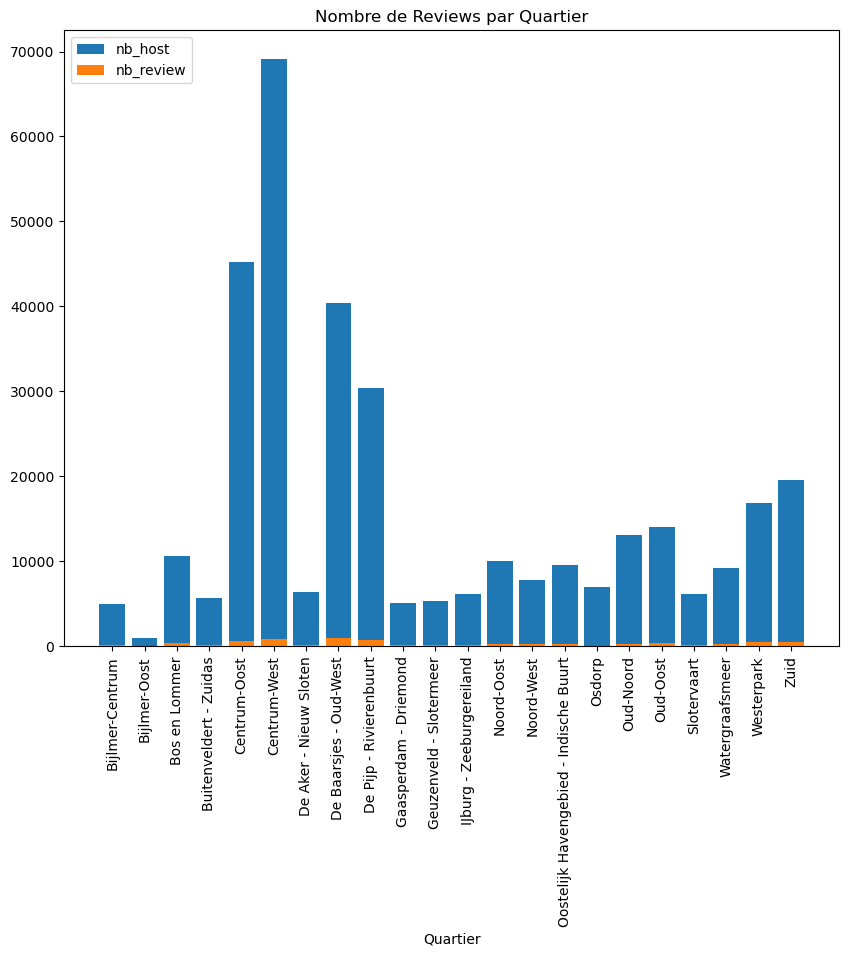

In [187]:
# QUESTION N°1

quartiers = listing.groupby(by="neighbourhood_cleansed")

# Nombre de review
nb_review = quartiers["number_of_reviews"].sum()

# Nombre de host
nb_host = quartiers['id'].count()
question1 = pd.DataFrame({'nb_host': nb_host, 'nb_review': nb_review})

plt.figure(figsize=(10, 8))

plt.bar(question1.index, question1.nb_review)
plt.bar(question1.index, question1.nb_host)


plt.legend()
plt.title("Nombre de Reviews par Quartier")
plt.xlabel("Quartier")
plt.xticks(rotation=90)
plt.legend(question1,loc=2)


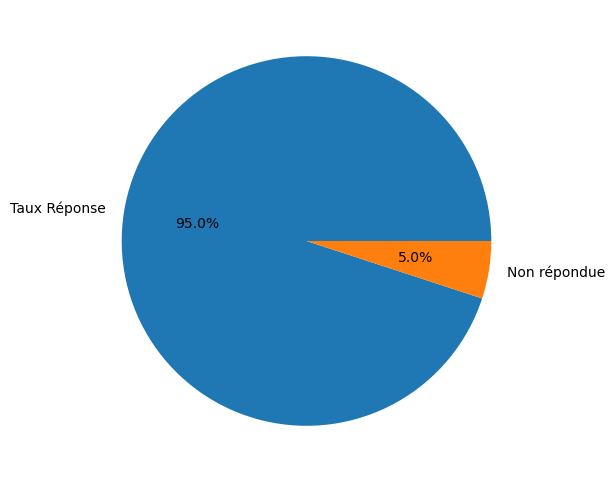

In [188]:
# QUESTION N°2

# Taux de reponse moyen
moyenne_response = listing["host_response_rate"].str.rstrip('%').astype(float).mean()
moyenne_response

# Taux acceptation moyen
moyenne_accept = listing["host_acceptance_rate"].str.rstrip('%').astype(float).mean()
moyenne_accept

question2 = pd.DataFrame({'mean_response': [moyenne_response], 'mean_accept': [moyenne_accept]})


plt.figure(figsize=(6,6))

plt.pie([question2.mean_response[0], 100-question2.mean_response[0]], autopct='%1.1f%%', labels=["Taux Réponse", "Non répondue"])

plt.show()

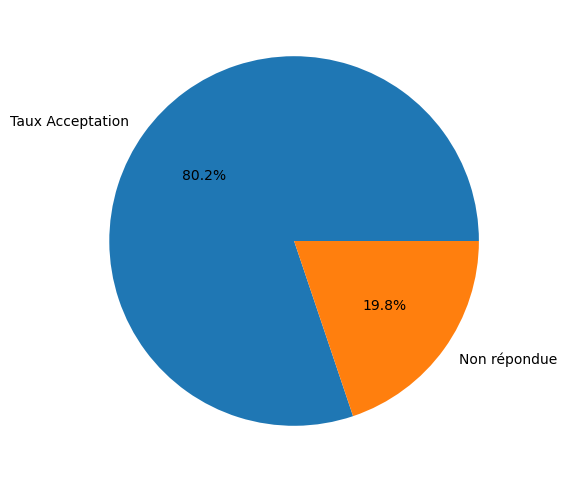

In [189]:
plt.figure(figsize=(6,6))
plt.pie([question2.mean_accept[0], 100-question2.mean_accept[0]], autopct='%1.1f%%', labels=["Taux Acceptation", "Non répondue"])
plt.show()

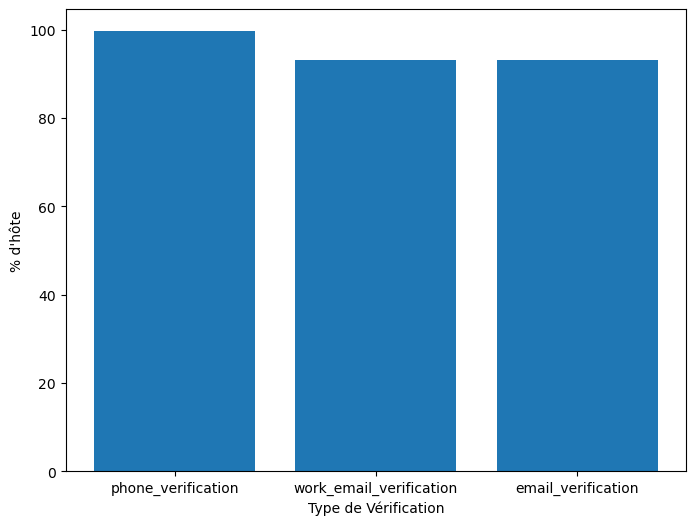

In [190]:
# QUESTION N°3

# Pourcentage type vérification (phone, work_email, email)
phone_verification = listing["host_verifications"].apply(lambda x: 1 if "phone" in x else 0).sum() / listing["host_verifications"].count() * 100
work_email_verification = listing["host_verifications"].apply(lambda x: 1 if "work_email" in x else 0).sum() / listing["host_verifications"].count() * 100
email_verification = listing["host_verifications"].apply(lambda x: 1 if "email" in x and "work_email" != x else 0).sum() / listing["host_verifications"].count() * 100

question3 = pd.DataFrame({'phone_verification': [phone_verification], 'work_email_verification': [email_verification], 'email_verification' : [email_verification]}, index=["% par host"])

plt.figure(figsize=(8,6))

plt.bar(question3.columns, question3.values[0])
plt.ylabel("% d'hôte")
plt.xlabel("Type de Vérification")
plt.show()

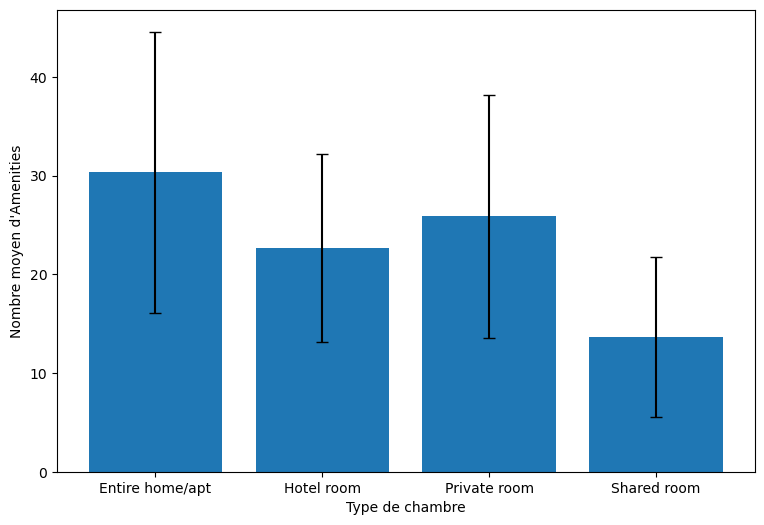

In [194]:
# QUESTION N°4

# Moyenne d'amenities & écart type
amenities = listing['amenities'].apply(lambda x: str(x)[1:-1].replace('"', '').replace("\\u2013", "-")).str.split(pat=",")
listing['amenities'] = amenities

listing["nb_amenities"] = listing["amenities"].apply(lambda x: len(x))

g_room_type = listing[["room_type","nb_amenities"]].groupby(['room_type']).agg(['mean', 'std'])

plt.figure(figsize=(9,6))

plt.bar(g_room_type['nb_amenities'].index, g_room_type['nb_amenities']["mean"], yerr=g_room_type['nb_amenities']["std"], capsize=4)

plt.ylabel("Nombre moyen d'Amenities")
plt.xlabel("Type de chambre")
plt.show()

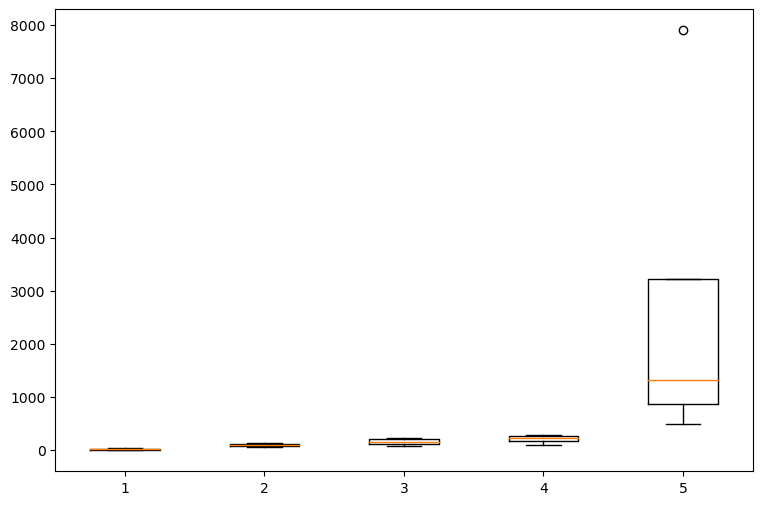

In [227]:
# QUESTION N°5
listing["price"] = listing["price"].apply(lambda x: str(x).replace(",", "").replace("$", "")).astype(float)

prix = listing[["room_type","price"]].groupby(["room_type"]).describe()
prix = prix['price'].drop(['count', 'std', 'mean'], axis=1)

plt.figure(figsize=(9,6))

plt.boxplot(prix)
plt.show()